In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [25]:
df = pd.read_csv("Elections_2019.csv")
# print("Unique Turncoat values:", df['Turncoat'].unique())
turncoat_df = df[df['Turncoat'] == True]
# print(turncoat_df.head())
specified_parties = ['BSP', 'INC', 'AAAP', 'BJP','SP', 'AITC']
turncoats_for_specified_parties = turncoat_df[turncoat_df['Party'].isin(specified_parties)]

turncoat_counts = turncoats_for_specified_parties['Party'].value_counts()
print(turncoat_counts)


INC     40
BJP     23
BSP      9
SP       7
AITC     6
AAAP     1
Name: Party, dtype: int64


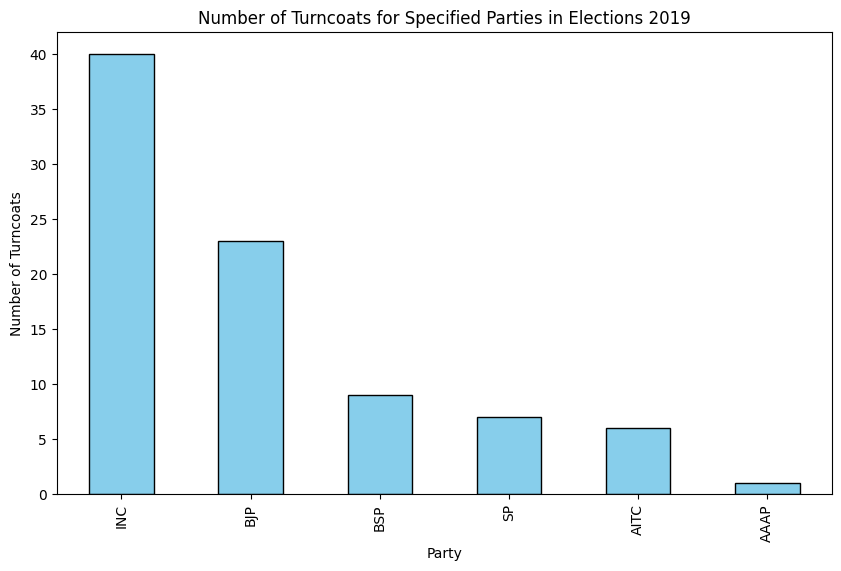

In [26]:
plt.figure(figsize=(10, 6))
turncoat_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Party')
plt.ylabel('Number of Turncoats')
plt.title('Number of Turncoats for Specified Parties in Elections 2019')

plt.show()

BJP     13
INC      2
AITC     2
BSP      1
Name: Party, dtype: int64


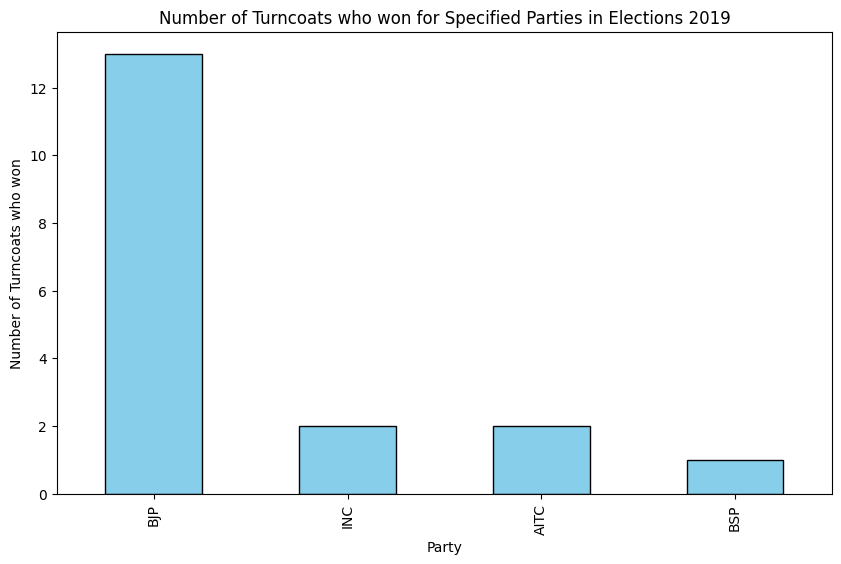

BJP     13
INC      2
AITC     2
BSP      1
Name: Party, dtype: int64


In [27]:
df = pd.read_csv("Elections_2019.csv")

turncoat_df = df[df['Turncoat'] == True]

turncoats_for_specified_parties = turncoat_df[turncoat_df['Party'].isin(specified_parties)]

turncoats_won = turncoats_for_specified_parties[turncoats_for_specified_parties['Position'] == 1]

turncoats_won_counts = turncoats_won['Party'].value_counts()
print(turncoats_won_counts)
# Display the data in a bar graph
plt.figure(figsize=(10, 6))
turncoats_won_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Party')
plt.ylabel('Number of Turncoats who won')
plt.title('Number of Turncoats who won for Specified Parties in Elections 2019')

# Show the plot
plt.show()

# Display the count of turncoats who won for each specified party
print(turncoats_won_counts)

posx and posy should be finite values
posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values


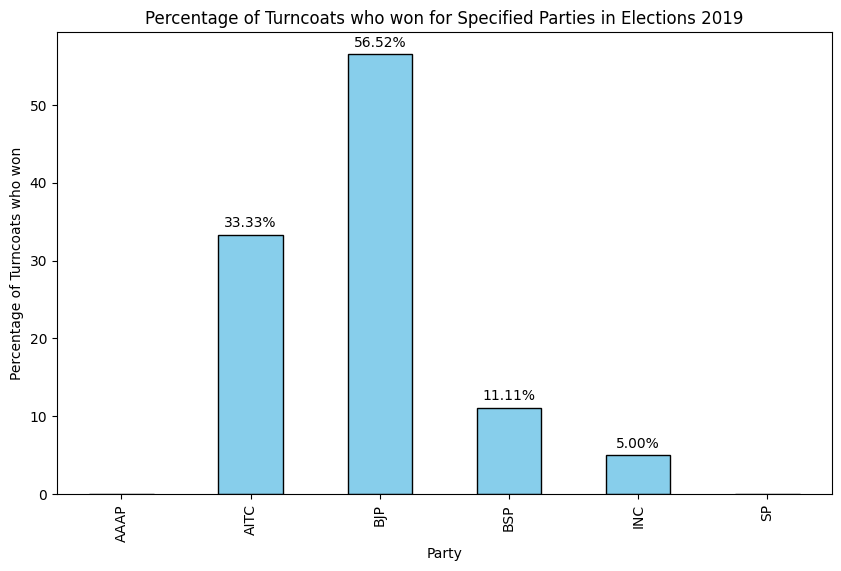

In [28]:
# Calculate the percentage of turncoats who won for each party
turncoats_percentage_won = (turncoats_won_counts / turncoat_counts) * 100
turncoats_percentage_won = turncoats_percentage_won.round(2)
# print(turncoat_counts)
# print(turncoats_percentage_won)
# Display the data in a bar graph
plt.figure(figsize=(10, 6))
turncoats_percentage_won.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Party')
plt.ylabel('Percentage of Turncoats who won')
plt.title('Percentage of Turncoats who won for Specified Parties in Elections 2019')

# Adding percentage labels to the bars
for i, v in enumerate(turncoats_percentage_won):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

# Show the plot
plt.show()

Party
BSP      0.000000
INC     39.814815
AAAP     0.000000
BJP     57.407407
SP      25.000000
AITC    25.000000
Name: Win_Percentage, dtype: float64


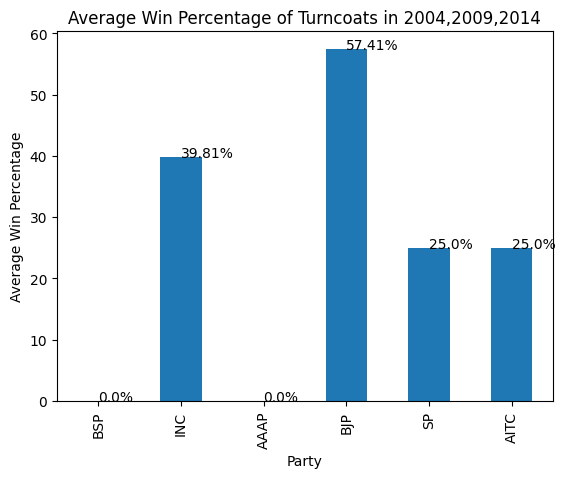

In [33]:

df_2014 = pd.read_csv("Elections_2014.csv")
df_2009 = pd.read_csv("Elections_2009.csv")
df_2004 = pd.read_csv("Elections_2004.csv")
df_2019 = pd.read_csv("Elections_2019.csv")


def find_previous_year_result(row, previous_df):
    candidate_name = row['Candidate']
    party = row['Party']
    constituency_name = row['Constituency_Name']

    previous_year_data = previous_df[
        (previous_df['Candidate'] == candidate_name)
    ]

    if not previous_year_data.empty:
        return 1 if previous_year_data.iloc[0]['Position'] == 1 else 0
    else:
        return None


df_2019['Won_2014'] = df_2019.apply(lambda row: find_previous_year_result(row, df_2014), axis=1)
df_2019['Won_2009'] = df_2019.apply(lambda row: find_previous_year_result(row, df_2009), axis=1)
df_2019['Won_2004'] = df_2019.apply(lambda row: find_previous_year_result(row, df_2004), axis=1)


# for party in specified_parties:
#     party_turncoats = df_2019[(df_2019['Party'] == party) & (df_2019['Turncoat'] == True)]
    # print(party_turncoats)
    # print(f"\nTurncoats for Party {party} in 2019:")
    # for _, row in party_turncoats.iterrows():
    #     print(f"Name: {row['Candidate']}, Won in 2014: {row['Won_2014']}, Won in 2009: {row['Won_2009']}, Won in 2004: {row['Won_2004']}")

def calculate_win_percentage(row):
    num_years_contested = sum(pd.notnull(row[['Won_2014', 'Won_2009', 'Won_2004']]))
    total_wins = row[['Won_2014', 'Won_2009', 'Won_2004']].sum()
    if num_years_contested > 0:
        return (total_wins / num_years_contested) * 100
    else:
        return None

df_2019['Win_Percentage'] = df_2019.apply(calculate_win_percentage, axis=1)

# turncoats_avg_win_percentage = df_2019[df_2019['Turncoat'] == True].groupby('Party')['Win_Percentage'].mean()

turncoats_avg_win_percentage = df_2019[df_2019['Turncoat'] == True].groupby('Party')['Win_Percentage'].mean()
# get the specified_parties only
turncoats_avg_win_percentage = turncoats_avg_win_percentage[specified_parties]
print(turncoats_avg_win_percentage)
# print(turncoats_win_percentage[['Candidate', 'Party', 'Win_Percentage']])
# print(turncoats_avg_win_percentage)
# plot the bar chart
turncoats_avg_win_percentage.plot.bar()
plt.ylabel('Average Win Percentage')
plt.title('Average Win Percentage of Turncoats in 2004,2009,2014')
# display the percentage on the bar chart
for index, value in enumerate(turncoats_avg_win_percentage):
    plt.text(index, value, str(round(value,2))+'%')
    
plt.show()
